# Libraries 


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Import Data

In [2]:
df_segmentation = pd.read_csv("segmentation data.csv", index_col = 0)

## Explore Data

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Correlation Estimate

Pearson correlation - Linear dependency between variables.
This ranges between -1 through 0 to 1. 
1 being very strong correlation, -1 negative correlation, and 0 being not linearly dependent.
eg. OCCUPATION 0.680357 AND INCOME 0.680357 so if you have a higher paying job, you are more likely to live in a bigger home.

In [5]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


AttributeError: 'tuple' object has no attribute 'set_yticklabels'

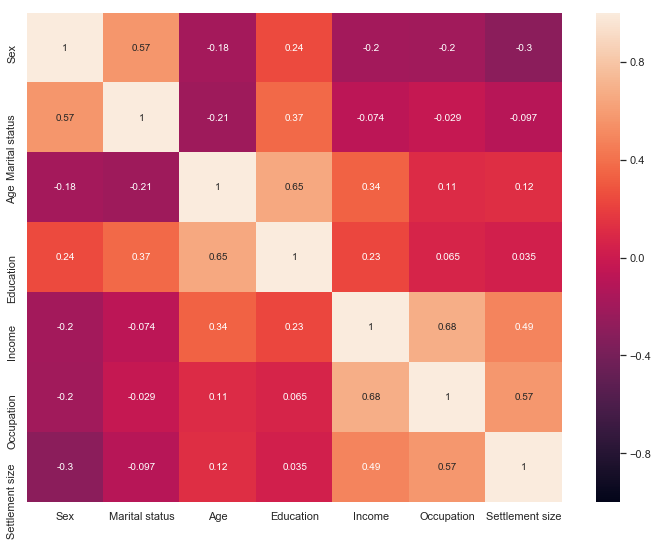

In [6]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_segmentation.corr(), 
                annot = True, 
                cmap = 'rocket',
                vmin = -1,
                vmax = 1), 
s.set_yticklabels(s.get_yticklabels(), rotation = 0, font = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, font = 12) 
plt.title("Correlation Heatmap")
plt.show()

# Visualise Raw Data

Text(0.5, 1.0, 'Visualization of Raw Data')

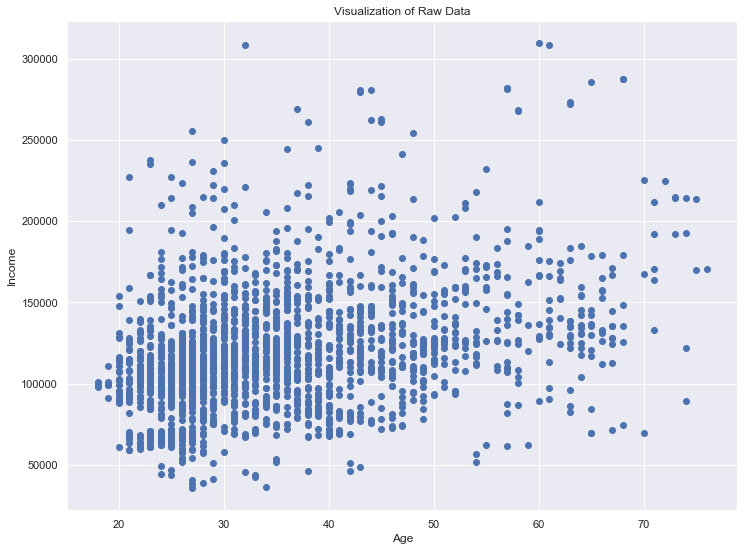

In [7]:
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')

# Standardization

In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

C:\Users\grant\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\grant\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Hierarchical Clustering

for segmentation and customer analytics

In [9]:
hier_clust = linkage(segmentation_std, method = 'ward')

<function matplotlib.pyplot.show(*args, **kw)>

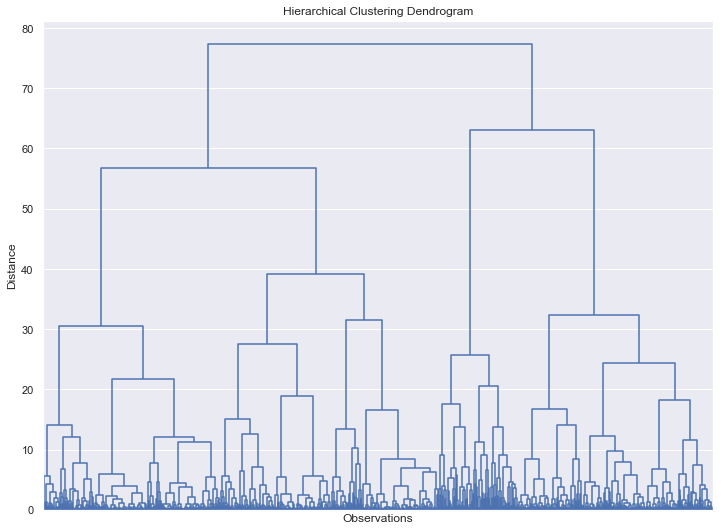

In [10]:
plt.figure(figsize = (12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
          show_leaf_counts = False,
           no_labels = True,
          color_threshold = 0)
plt.show

In [ ]:
plt.figure(figsize = (12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
           no_labels = True,
          color_threshold = 0)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

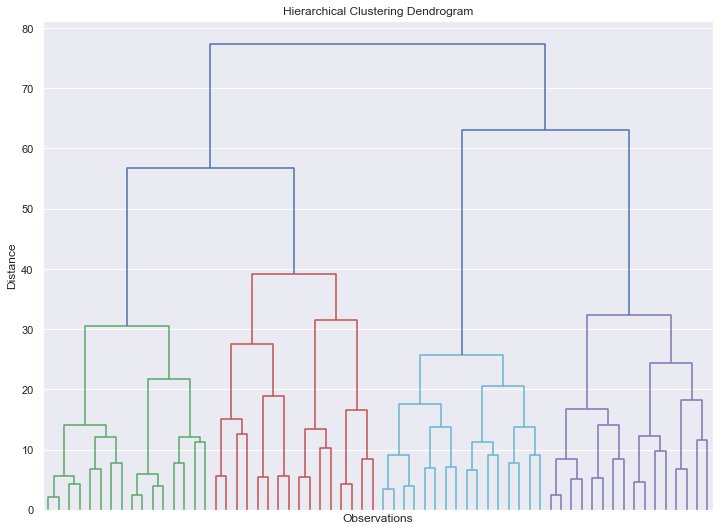

In [11]:
plt.figure(figsize = (12, 9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
          show_leaf_counts = False,
           no_labels = True,
          )
plt.show

# K-means Clustering

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 59)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)
    

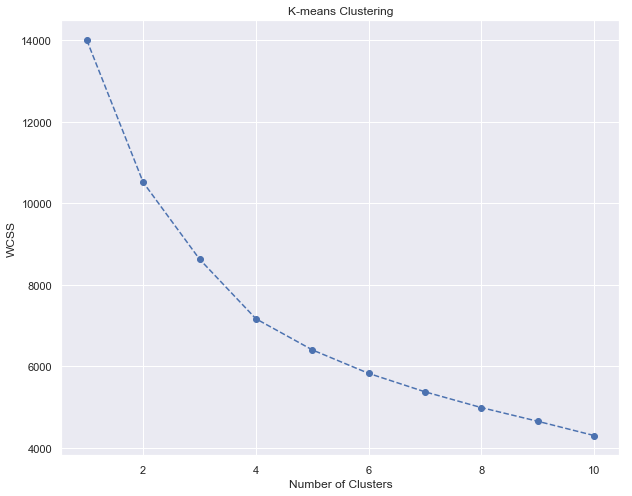

In [13]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()


Use "Elbow Method" to determine how many clusters is best. In this we see that 4 is at the "Elbow" (Arm steeply declining until it reaches for then the decline smoothens out)

In [14]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 59)

In [15]:
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=59, tol=0.0001, verbose=0)

In [16]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [17]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis


,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


# Interpreting the data

I will start from row 3 and this shows that the 'Sex' column indicates that the cluster is equally populated with men and women shown by the fig. 0.501901, Then we see that the mean age is 55.703422, More than 2 thirds are in a relationship (0.692015), and they are in the group with the highest level of income and education (2.129278 and 158338.422053)

It is crucial to name the segments and this one we will call 'Well-off'.

Row 0 shows that 2 thirds are male and almost all are single (0.352 and 0.019). Average age is 36 (36.577) and their education is low (0.746) compared to the other clusters. They also have low incomes(97859.852) and come from small cities(0.043).

we will call this group 'Fewer-Opportunities'.

Row 2 shows a cluster compromised nearly entirely of men (0.029) and who are mainly single , average age of 36, high income and live in big cities and low education. These will be called 'Career-Driven'.

Row 1 shows predomimately females in steady jobs nearly all in realtionships average age of 29. these will be called the standard.

In [18]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means',]).count()

In [19]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [20]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
1,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [21]:
df_segm_analysis.rename({0 :'Career-Driven',
                        1:'Standard',
                        2:'Fewer-Oppurtunities',
                        3: 'Well-Off'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
Career-Driven,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Fewer-Oppurtunities,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Well-Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [22]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0 :'Career-Driven',
                        1:'Standard',
                        2:'Fewer-Oppurtunities',
                        3: 'Well-Off'})

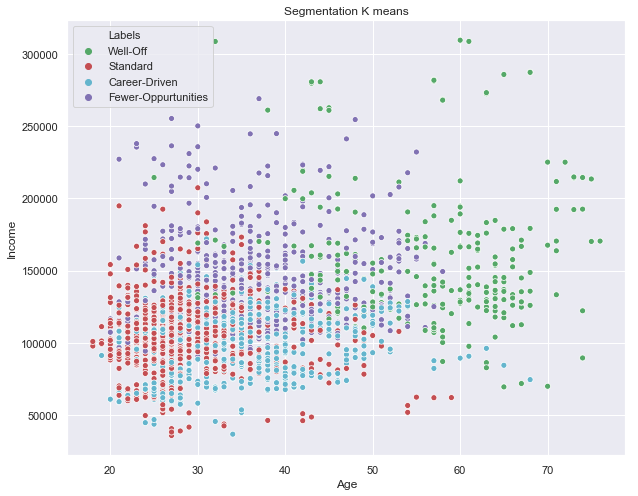

In [23]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K means')
plt.show()

# PCA

Principal Component Analysis

In [24]:
pca = PCA()

In [25]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumalitive Explained Variance')

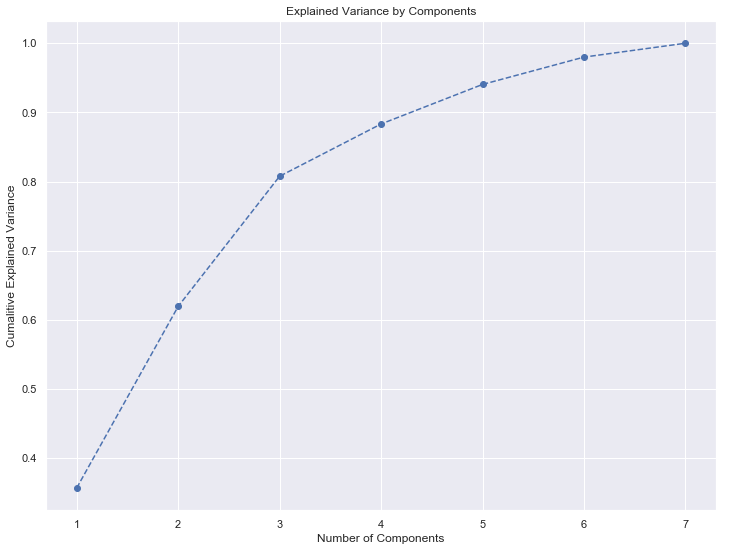

In [27]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumalitive Explained Variance')


Rule of thumb is to keep around 80% so in this case either 3 or 4 is good but there is no definitive answer. Keeping 7 i.e. 100% is 100% data however this will not reduce the fuction at all. 

In [28]:
pca = PCA(n_components = 3)

In [29]:
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# PCA Results

In [30]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

This is a 3*7 array. Loading: correlation between an original variable and a component 

In [31]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns = df_segmentation.columns.values,
                          index = ['Components 1', 'Components 2', 'Components 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Components 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Components 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Components 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Values are in range [-1,1] as they are essentially correlations. This means the closer to 0 they get the lower the loading to the component.

([<matplotlib.axis.YTick at 0x1f29608b278>,
 <a list of 3 Text yticklabel objects>)

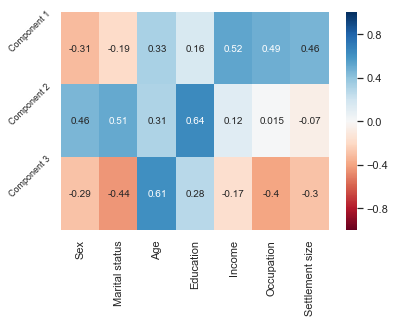

In [32]:
sns.heatmap(df_pca_comp, 
           vmin = -1,
           vmax = 1,
           cmap = 'RdBu',
           annot = True)
plt.yticks ([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'], 
           rotation = 45,
           fontsize = 9)

Breakdown:

There is a positive correlation with component 1 and age,education, income, occupation, settlement size. As you may have guessed this shows the attributes of the career driven.

Component 2 shows a positive correlation with education and lifestyle, therefore they differ the career in favour for lifestyle.

Compomnent 3s main attributes are the Marital status, Age, and Occupation.


In [33]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

Theses are referred to as PCA Scores

In [34]:
scores_pca = pca.transform(segmentation_std)

# K-means clustering with PCA 

In [35]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 59)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

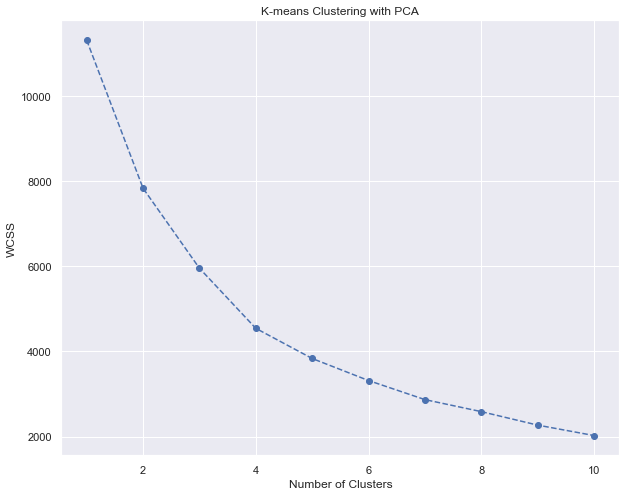

In [36]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering with PCA')
plt.show()

*Elbow method*

In [37]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 59)

In [38]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=59, tol=0.0001, verbose=0)